In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### Data Loading and Filtering

In [241]:
df = pd.read_csv("../zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] >= 75
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,False
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,False


In [242]:
Y = df['Passed'].values
X_df = df.drop(columns=['Passed'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X_df = X_standardized.values

In [243]:
X = X_df
X = np.column_stack((
    np.ones(len(df)),
    X
))

In [244]:
# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Cost Function

In [245]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.log(y_hat))
    neg_component = np.sum((1 - Y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

#### Optimization

In [246]:
def compute_gradients(X, Y, y_hat):
    m = len(Y)

    """
    beta0, beta1    
    """

    beta = (1 / m) * X.T.dot(y_hat - Y)

    return beta

In [247]:
beta = np.random.randn(8)
print(f"beta values : {beta}")

lr = 0.01
n_iter = 1000

beta values : [ 1.14428249  0.32316799  0.68963916  0.58034085  0.8444274  -0.50612103
 -1.83616224 -1.70612144]


#### Parameter optimization

In [248]:

cost_history = []
def logistic_gradient_descent(X, Y, lr,beta):
    for i in range(n_iter):
        """
        Z = beta.T.X = beta0 + beta1.x1
        Y_hat = sigmoid(Z)
        """
        z = X.dot(beta)
        y_hat = sigmoid(z)

        gradient = compute_gradients(X, Y, y_hat)

        beta = beta - lr * gradient

        cost = compute_cost(y_hat, Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration : {i}: Beta : {beta} :Cost : {cost:.4f}")
        
    return beta

In [249]:
beta = logistic_gradient_descent(X, Y, lr,beta)

Iteration : 0: Beta : [ 1.13945792  0.32294707  0.68943084  0.58233384  0.84309091 -0.50659904
 -1.83444986 -1.70367604] :Cost : 1.6401
Iteration : 100: Beta : [ 0.68279941  0.30116018  0.66764541  0.76317169  0.71464955 -0.54599864
 -1.66691727 -1.46461235] :Cost : 1.2937
Iteration : 200: Beta : [ 0.28164451  0.27852113  0.64296652  0.90710988  0.59934605 -0.56797251
 -1.51011892 -1.24164028] :Cost : 1.0219
Iteration : 300: Beta : [-0.06198676  0.25381991  0.61492432  1.01734786  0.49887287 -0.57358312
 -1.36739518 -1.04142251] :Cost : 0.8187
Iteration : 400: Beta : [-0.35201645  0.22677515  0.58447394  1.10037964  0.41206868 -0.56606974
 -1.23958131 -0.86679907] :Cost : 0.6709
Iteration : 500: Beta : [-0.59596504  0.19783429  0.5532629   1.16378257  0.33689295 -0.54941957
 -1.12557952 -0.71667386] :Cost : 0.5636
Iteration : 600: Beta : [-0.8020107   0.16775477  0.52270122  1.21426504  0.27158225 -0.52713914
 -1.02355772 -0.58801419] :Cost : 0.4847
Iteration : 700: Beta : [-0.97739464

#### Cost Visualization

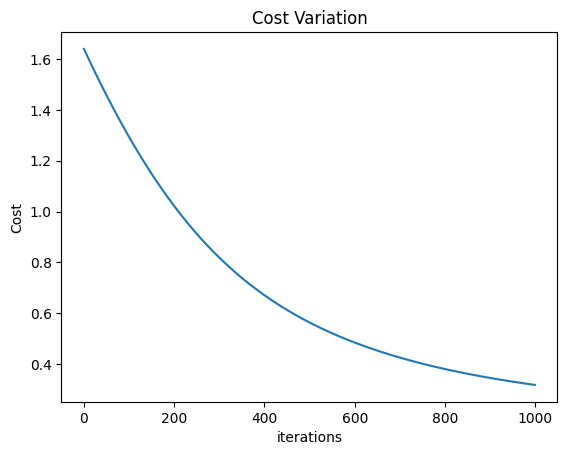

In [250]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Predict Probability

In [251]:
def predict_proba(X, beta):
    z = X.dot(beta)
    Y_proba = sigmoid(z)
    return Y_proba

In [252]:
Y_proba = predict_proba(X, beta)
Y_proba

array([0.10342277, 0.57373871, 0.46832663, 0.08786347, 0.88584772,
       0.60752655, 0.03405352, 0.27897382, 0.07346821, 0.14401371,
       0.1482413 , 0.01699504, 0.09158278, 0.19359384, 0.18946791,
       0.01950776, 0.6276372 , 0.09722355, 0.37770094, 0.67992594,
       0.07443867, 0.10558985, 0.02024962, 0.93059295, 0.85550767,
       0.16878835, 0.10552439, 0.01499421, 0.13010122, 0.05474663,
       0.88271203, 0.10013208, 0.06331691, 0.65820105, 0.4264318 ,
       0.68974926, 0.01068005, 0.1053483 , 0.06166601, 0.3224506 ,
       0.34492441, 0.27576369, 0.18643258, 0.53717495, 0.07960282,
       0.09882059, 0.29190765, 0.01255407, 0.27491607, 0.13711979,
       0.26795161, 0.12653291, 0.06879433, 0.4024029 , 0.7325088 ,
       0.33507099, 0.59041543, 0.32356556, 0.4031158 , 0.23171531,
       0.02786555, 0.28386784, 0.07893144, 0.72700742, 0.15123255,
       0.11390723, 0.2681806 , 0.09985618, 0.49649847, 0.08479083,
       0.06137525, 0.11880546])

####  Binary class predictions

In [253]:
def predict_class(X, beta, threshold):
    z = X.dot(beta)
    Y_predicted = sigmoid(z)
    return Y_predicted >= threshold

In [254]:
predict_class(X,beta,0.5)

array([False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False])

#### Evaluation Matrics

##### Conusion Matrix

In [255]:
def compute_confusion_matrix(Y,Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array([
                [TN,FP]
                ,[FN,TP]
                ],
                dtype=int
                )

In [256]:
Y_hat = predict_class(X,beta,0.5)

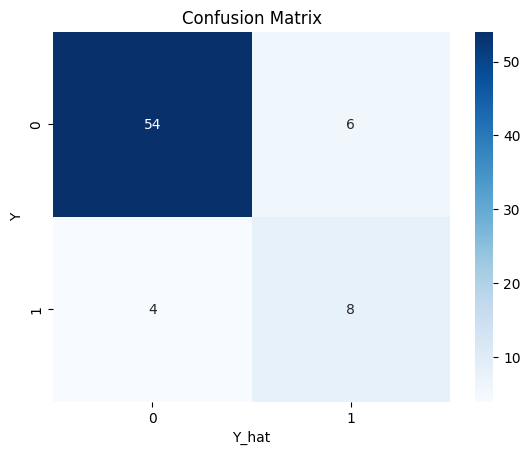

In [257]:
cm = compute_confusion_matrix(Y,Y_hat)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

##### Precisiom, Recall, f1score, accuracy

In [258]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP/(TP+FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP +FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm)
    return 2 * p * r / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN) / (TP + TN + FP + FN)

In [259]:
cm = compute_confusion_matrix(Y, Y_hat) 
p = precision_score(cm)
r = recall_score(cm) 
f1 = f1_score(cm)
acc = accuracy(cm)

print(f"Precision : {p}")
print(f"Recall : {r}")
print(f"F1 Score : {f1}")
print(f"Accuracy : {acc}")

Precision : 0.5714285714285714
Recall : 0.6666666666666666
F1 Score : 0.6153846153846153
Accuracy : 0.8611111111111112


In [260]:
Precision= []
Recall = []

##### ROC curve

In [261]:
def roc_curve(Y,Y_proba):
    thresholds = np.linspace(1,0,200)

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)
        
        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)

        if (TP + FP) == 0:
            precision = 0 
        else:
            precision = TP / (TP + FP)

        recall = TP / (TP +FN)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        Precision.append(precision)
        Recall.append(recall)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)

In [262]:
tpr, fpr, _ = roc_curve(Y, Y_proba)

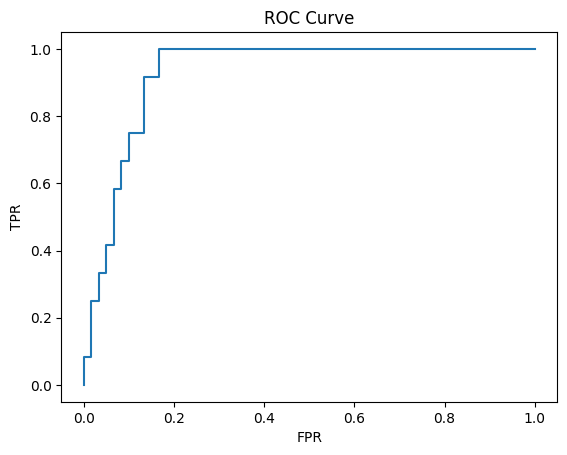

In [263]:
plt.plot(fpr, tpr, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [264]:
auc = np.trapezoid(tpr, fpr)
print(f"AUC: {auc}")

AUC: 0.9277777777777777


####  Precision Recall Curve 

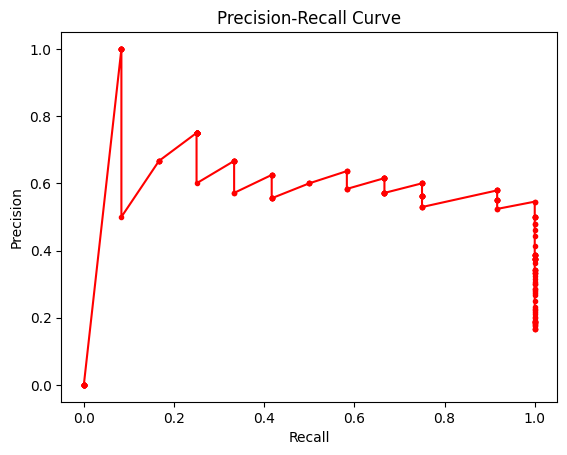

In [265]:
plt.plot(Recall, Precision, color='red',marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
